In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['simhei'] #显示中文
plt.rcParams['axes.unicode_minus']=False   #用来正常显示负号
%matplotlib inline

In [2]:
ex0 = pd.read_table('ex0.txt',header=None)

In [3]:
ex0.head()

,0,1,2
0,1.0,0.067732,3.176513
1,1.0,0.427810,3.816464
2,1.0,0.995731,4.550095
3,1.0,0.738336,4.256571
4,1.0,0.981083,4.560815


In [4]:
ex0.shape

(200, 3)

In [5]:
ex0.describe()

,0,1,2
count,200.0,200.000000,200.000000
mean,1.0,0.488319,3.835601
std,0.0,0.292943,0.503443
min,1.0,0.014855,3.078132
25%,1.0,0.234368,3.452775
50%,1.0,0.466573,3.839350
75%,1.0,0.730712,4.247613
max,1.0,0.995731,4.692514


In [6]:
def get_Mat(dataSet):
    xMat = np.mat(dataSet.iloc[:,:-1].values)
    yMat = np.mat(dataSet.iloc[:,-1].values).T
    return xMat,yMat

In [8]:
xMat,yMat = get_Mat(ex0)

In [10]:
xMat[:10]

matrix([[1.      , 0.067732],
        [1.      , 0.42781 ],
        [1.      , 0.995731],
        [1.      , 0.738336],
        [1.      , 0.981083],
        [1.      , 0.526171],
        [1.      , 0.378887],
        [1.      , 0.033859],
        [1.      , 0.132791],
        [1.      , 0.138306]])

In [11]:
yMat[:10]

matrix([[3.176513],
        [3.816464],
        [4.550095],
        [4.256571],
        [4.560815],
        [3.929515],
        [3.52617 ],
        [3.156393],
        [3.110301],
        [3.149813]])

In [21]:
def plotShow(dataSet):
    xMat,yMat=get_Mat(dataSet)
    plt.scatter(xMat.A[:,1],yMat.A,c='b',s=5)
    plt.show()

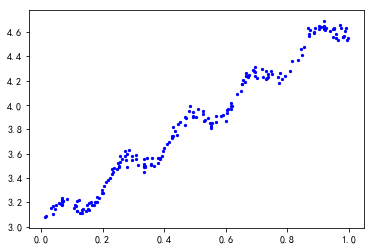

In [22]:
plotShow(ex0)

In [23]:
def standRegres(dataSet):
    xMat,yMat =get_Mat(dataSet)
    xTx = xMat.T*xMat
    if np.linalg.det(xTx)==0:                
        print('矩阵为奇异矩阵，无法求逆')
        return
    ws=xTx.I*(xMat.T*yMat)
    return ws

In [24]:
ws = standRegres(ex0)

In [25]:
ws

matrix([[3.00774324],
        [1.69532264]])

In [26]:
def plotReg(dataSet):
    xMat,yMat=get_Mat(dataSet)
    plt.scatter(xMat.A[:,1],yMat.A,c='b',s=5)
    ws = standRegres(dataSet)
    yHat = xMat*ws
    plt.plot(xMat[:,1],yHat,c='r')
    plt.show()

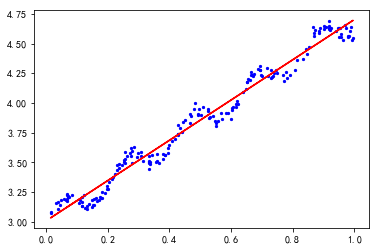

In [27]:
plotReg(ex0)

In [28]:
xMat,yMat =get_Mat(ex0)
ws =standRegres(ex0)
yHat = xMat*ws
np.corrcoef(yHat.T,yMat.T) #保证两个都是行向量

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

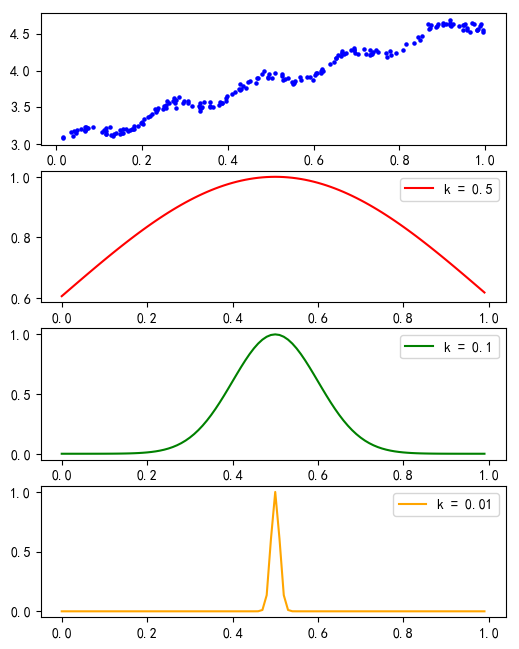

In [29]:
#此段代码供大家参考
xMat,yMat = get_Mat(ex0)
x=0.5
xi = np.arange(0,1.0,0.01)
k1,k2,k3=0.5,0.1,0.01
w1 = np.exp((xi-x)**2/(-2*k1**2))
w2 = np.exp((xi-x)**2/(-2*k2**2))
w3 = np.exp((xi-x)**2/(-2*k3**2))
#创建画布
fig = plt.figure(figsize=(6,8),dpi=100)
#子画布1，原始数据集
fig1 = fig.add_subplot(411)
plt.scatter(xMat.A[:,1],yMat.A,c='b',s=5)
#子画布2，w=0.5
fig2 = fig.add_subplot(412)
plt.plot(xi,w1,color='r')
plt.legend(['k = 0.5'])
#子画布3，w=0.1
fig3 = fig.add_subplot(413)
plt.plot(xi,w2,color='g')
plt.legend(['k = 0.1'])
#子画布4，w=0.01
fig4 = fig.add_subplot(414)
plt.plot(xi,w3,color='orange')
plt.legend(['k = 0.01'])
plt.show()

In [31]:
def LWLR(testMat,xMat,yMat,k=1.0):
    n=testMat.shape[0]
    m=xMat.shape[0]
    weights =np.mat(np.eye(m))
    yHat = np.zeros(n)
    for i in range(n):
        for j in range(m):
            diffMat = testMat[i]-xMat[j]
            weights[j,j]=np.exp(diffMat*diffMat.T/(-2*k**2))
        xTx = xMat.T*(weights*xMat)
        if np.linalg.det(xTx)==0:
            print('矩阵为奇异矩阵，不能求逆')
            return
        ws = xTx.I*(xMat.T*(weights*yMat))
        yHat[i]= testMat[i]*ws
    return ws,yHat

In [32]:
np.argsort([2,1,3])

array([1, 0, 2], dtype=int64)

In [34]:
xMat,yMat = get_Mat(ex0)
#将数据点排列（argsort()默认升序排列，返回索引）
srtInd = xMat[:,1].argsort(0)
xSort=xMat[srtInd][:,0]

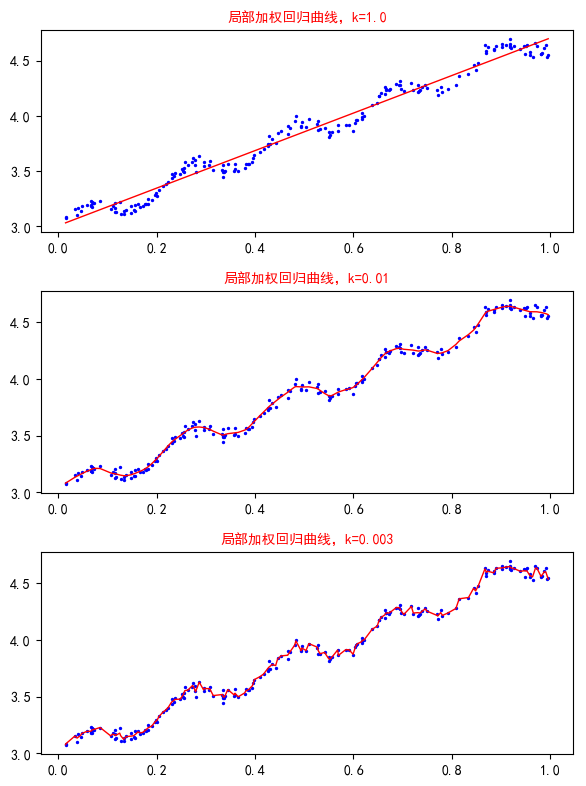

In [37]:
xMat,yMat = get_Mat(ex0)
#将数据点排列（argsort()默认升序排列，返回索引）
srtInd = xMat[:,1].argsort(0)
xSort=xMat[srtInd][:,0]

#计算不同k取值下的y估计值yHat
ws1,yHat1 = LWLR(xMat,xMat,yMat,k=1.0)
ws2,yHat2 = LWLR(xMat,xMat,yMat,k=0.01)
ws3,yHat3 = LWLR(xMat,xMat,yMat,k=0.003)

#创建画布
fig = plt.figure(figsize=(6,8),dpi=100)
#子图1绘制k=1.0的曲线
fig1=fig.add_subplot(311)
plt.scatter(xMat[:,1].A,yMat.A,c='b',s=2)
plt.plot(xSort[:,1],yHat1[srtInd],linewidth=1,color='r')
plt.title('局部加权回归曲线，k=1.0',size=10,color='r')
#子图2绘制k=0.01的曲线
fig2=fig.add_subplot(312)
plt.scatter(xMat[:,1].A,yMat.A,c='b',s=2)
plt.plot(xSort[:,1],yHat2[srtInd],linewidth=1,color='r')
plt.title('局部加权回归曲线，k=0.01',size=10,color='r')
#子图3绘制k=0.003的曲线
fig3=fig.add_subplot(313)
plt.scatter(xMat[:,1].A,yMat.A,c='b',s=2)
plt.plot(xSort[:,1],yHat3[srtInd],linewidth=1,color='r')
plt.title('局部加权回归曲线，k=0.003',size=10,color='r')
#调整子图的间距
plt.tight_layout(pad=1.2)
plt.show()

In [38]:
#四种模型相关系数比较
np.corrcoef(yHat.T,yMat.T)   #最小二乘法

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

In [39]:
np.corrcoef(yHat1,yMat.T)    #k=1.0模型

array([[1.        , 0.98647703],
       [0.98647703, 1.        ]])

In [40]:
np.corrcoef(yHat2,yMat.T)    #k=0.01模型

array([[1.       , 0.9985249],
       [0.9985249, 1.       ]])

In [41]:
np.corrcoef(yHat3,yMat.T)    #k=0.003模型

array([[1.        , 0.99931945],
       [0.99931945, 1.        ]])

In [42]:
abalone = pd.read_table('abalone.txt',header=None)
abalone.columns=['性别','长度','直径','高度','整体重量','肉重量','内脏重量','壳重','年龄']

In [43]:
abalone.head()

,性别,长度,直径,高度,整体重量,肉重量,内脏重量,壳重,年龄
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [44]:
abalone.shape

(4177, 9)

In [45]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
性别      4177 non-null int64
长度      4177 non-null float64
直径      4177 non-null float64
高度      4177 non-null float64
整体重量    4177 non-null float64
肉重量     4177 non-null float64
内脏重量    4177 non-null float64
壳重      4177 non-null float64
年龄      4177 non-null int64
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [46]:
abalone.describe()

,性别,长度,直径,高度,整体重量,肉重量,内脏重量,壳重,年龄
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,-1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,-1.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,1.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,1.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [47]:
mpl.cm.rainbow(np.linspace(0, 1, 10))

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.80392157e-01, 3.38158275e-01, 9.85162233e-01, 1.00000000e+00],
       [6.07843137e-02, 6.36474236e-01, 9.41089253e-01, 1.00000000e+00],
       [1.66666667e-01, 8.66025404e-01, 8.66025404e-01, 1.00000000e+00],
       [3.86274510e-01, 9.84086337e-01, 7.67362681e-01, 1.00000000e+00],
       [6.13725490e-01, 9.84086337e-01, 6.41213315e-01, 1.00000000e+00],
       [8.33333333e-01, 8.66025404e-01, 5.00000000e-01, 1.00000000e+00],
       [1.00000000e+00, 6.36474236e-01, 3.38158275e-01, 1.00000000e+00],
       [1.00000000e+00, 3.38158275e-01, 1.71625679e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

In [48]:
def dataPlot(dataSet):
    m,n=dataSet.shape
    fig = plt.figure(figsize=(8,20),dpi=100)
    colormap = mpl.cm.rainbow(np.linspace(0, 1, n))
    for i in range(n):
        fig_ = fig.add_subplot(n,1,i+1)
        plt.scatter(range(m),dataSet.iloc[:,i].values,s=2,c=colormap[i])
        plt.title(dataSet.columns[i])
        plt.tight_layout(pad=1.2)

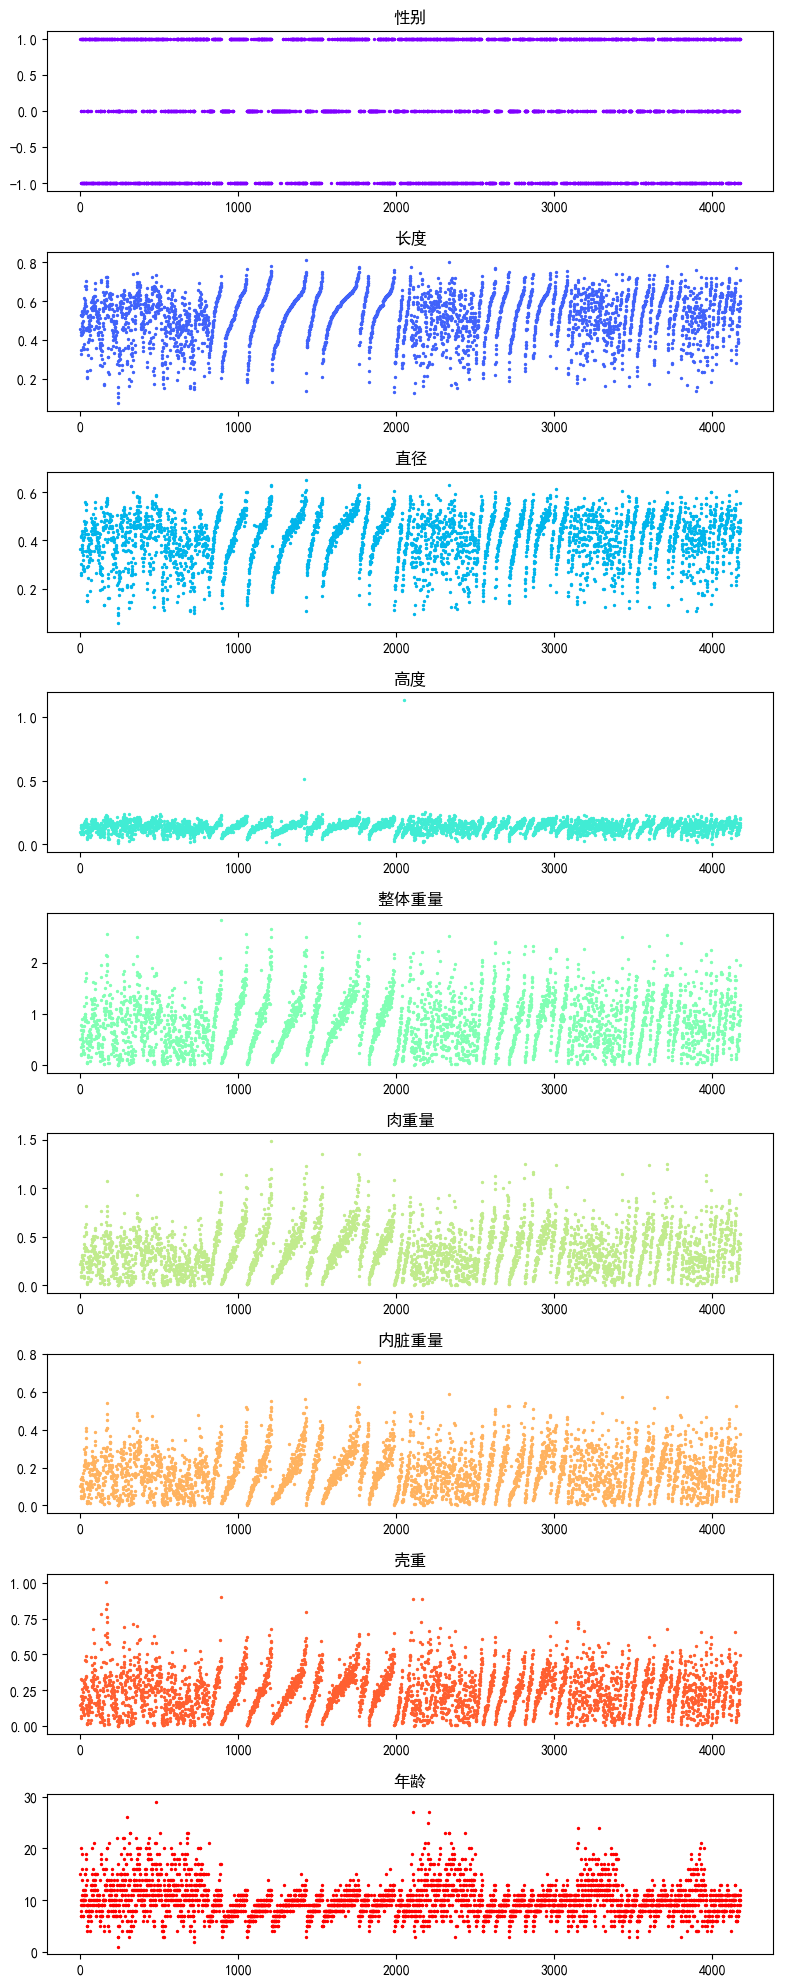

In [49]:
dataPlot(abalone)

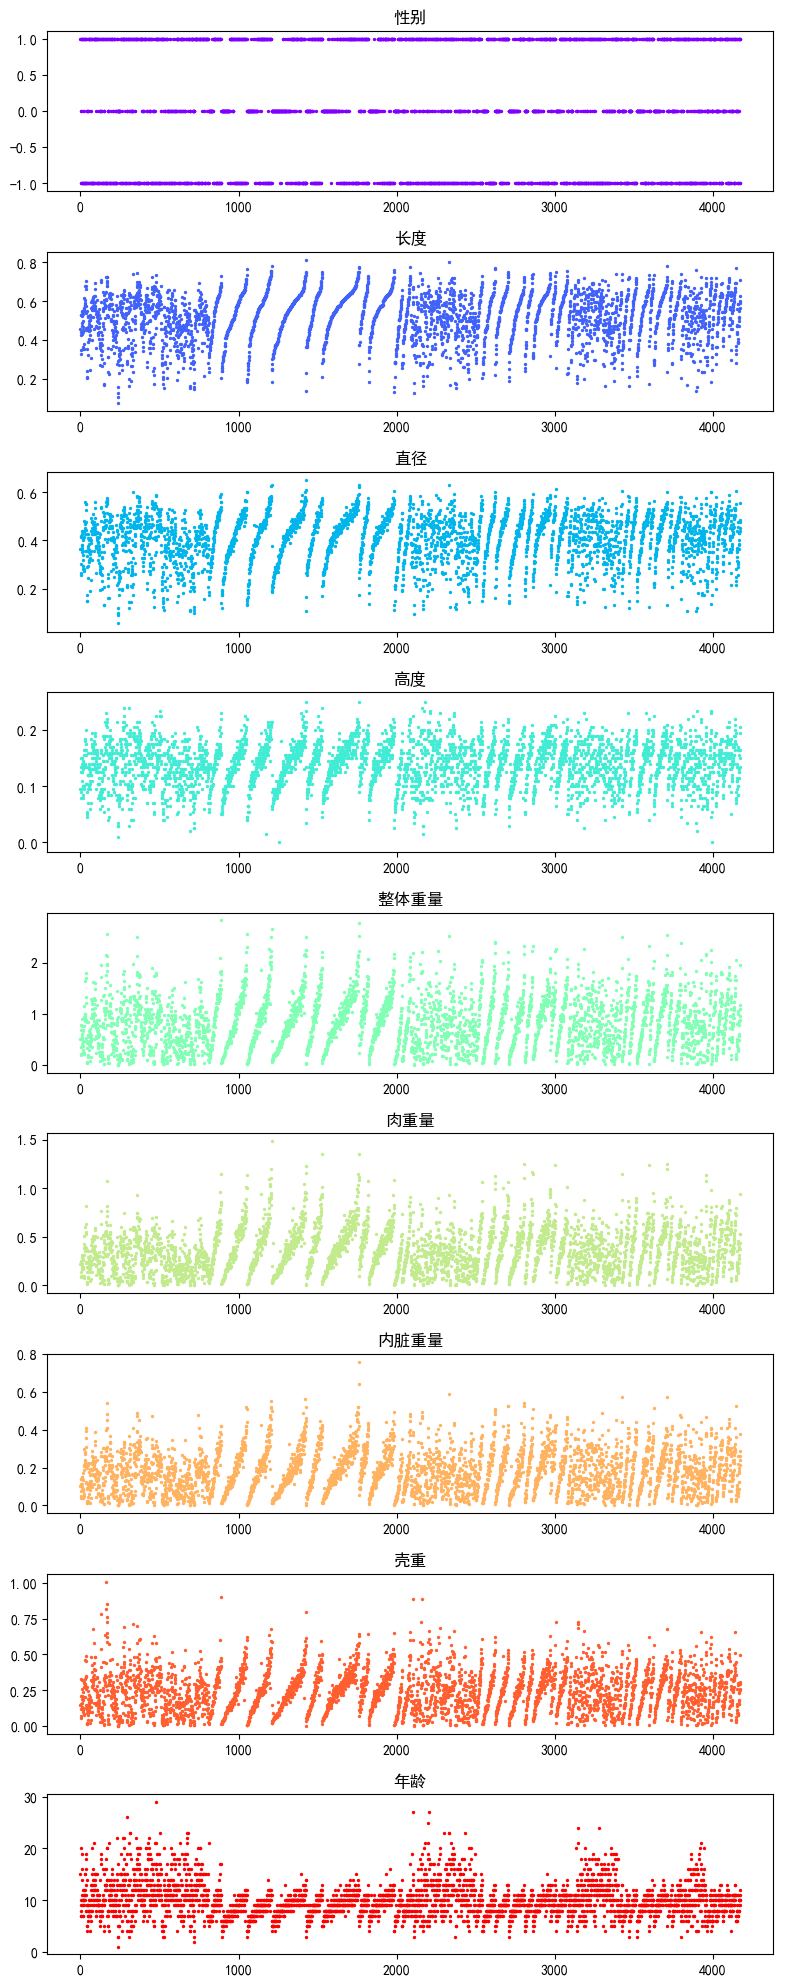

In [50]:
#剔除高度特征中≥0.4的异常值
aba = abalone.loc[abalone['高度']<0.4,:] 
dataPlot(aba)

In [51]:
def randSplit(dataSet,rate):
    l = list(dataSet.index)
    random.seed(123)
    random.shuffle(l)
    dataSet.index = l
    m = dataSet.shape[0]
    n = int(m*rate)
    train = dataSet.loc[range(n),:]
    test = dataSet.loc[range(n,m),:]
    test.index=range(test.shape[0])
    dataSet.index =range(dataSet.shape[0])
    return train,test

In [53]:
train,test = randSplit(aba,0.8)

In [54]:
train.head()

,性别,长度,直径,高度,整体重量,肉重量,内脏重量,壳重,年龄
0,-1,0.590,0.470,0.170,0.9000,0.3550,0.1905,0.2500,11
1,1,0.560,0.450,0.145,0.9355,0.4250,0.1645,0.2725,11
2,-1,0.635,0.535,0.190,1.2420,0.5760,0.2475,0.3900,14
3,1,0.505,0.390,0.115,0.5585,0.2575,0.1190,0.1535,8
4,1,0.510,0.410,0.145,0.7960,0.3865,0.1815,0.1955,8


In [55]:
train.shape

(3340, 9)

In [56]:
test.shape

(835, 9)

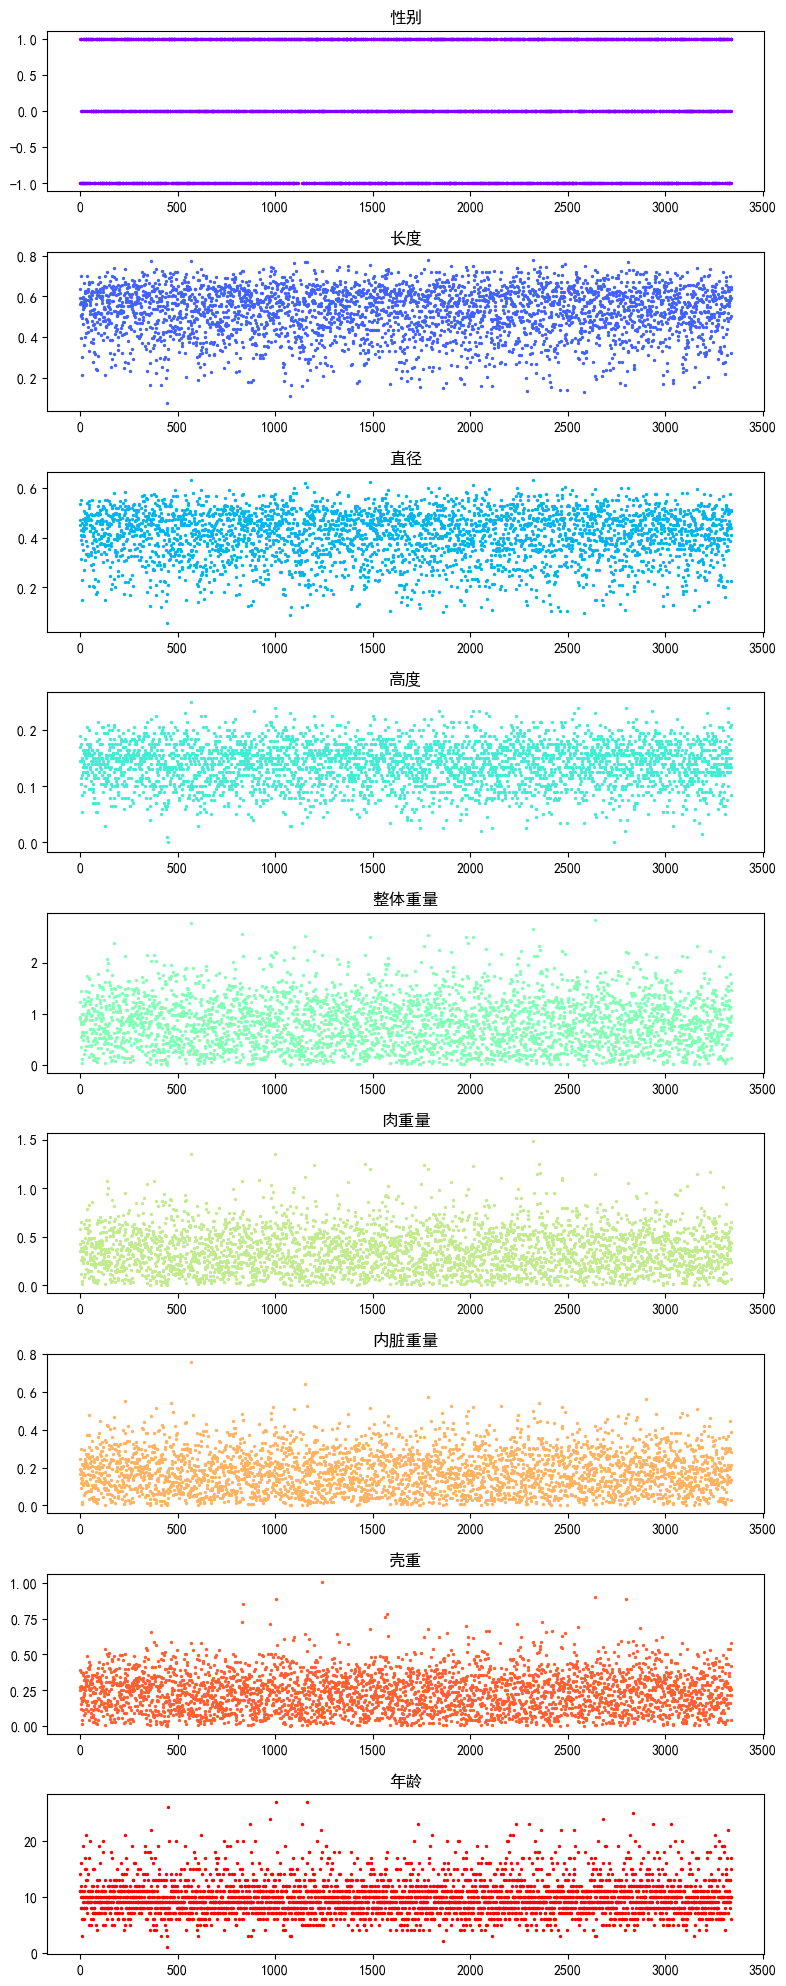

In [57]:
dataPlot(train)

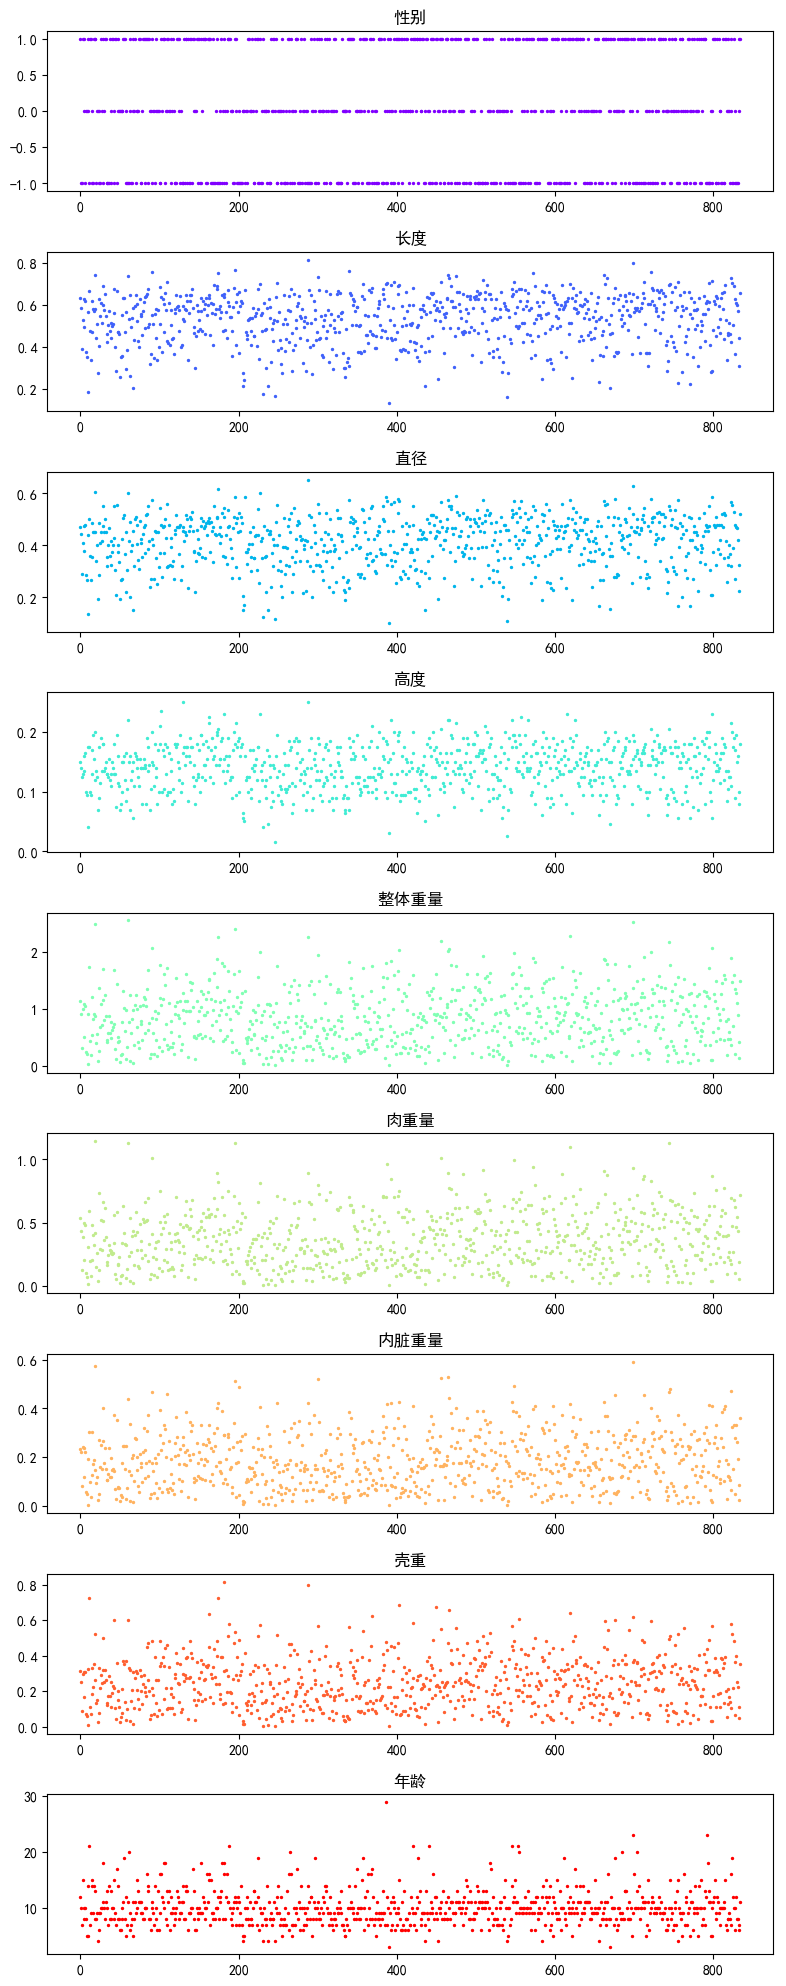

In [58]:
dataPlot(test)

In [62]:
def sseCal(dataSet, regres):
    xMat,yMat = get_Mat(dataSet)
    ws = regres(dataSet)
    yHat = xMat*ws
    sse = ((yMat.A.flatten() - yHat.A.flatten())**2).sum()
    return sse

In [63]:
sseCal(ex0, standRegres)

1.35524908168149

In [64]:
def rSquare(dataSet,regres):
    xMat,yMat=get_Mat(dataSet)
    sse = sseCal(dataSet,regres)
    sst = ((yMat.A-yMat.mean())**2).sum()
    r2 = 1 - sse / sst
    return r2

In [65]:
rSquare(ex0, standRegres)

0.9731300889856916

In [66]:
def ssePlot(train,test):
    X0,Y0 = get_Mat(train)
    X1,Y1 =get_Mat(test)
    train_sse = []
    test_sse = []
    for k in np.arange(0.2,10,0.5):
        ws1,yHat1 = LWLR(X0[:99],X0[:99],Y0[:99],k)
        sse1 = ((Y0[:99].A.T - yHat1)**2).sum()
        train_sse.append(sse1)
        
        ws2,yHat2 = LWLR(X1[:99],X0[:99],Y0[:99],k)
        sse2 = ((Y1[:99].A.T - yHat2)**2).sum()
        test_sse.append(sse2)
        
    plt.plot(np.arange(0.2,10,0.5),train_sse,color='b')
    plt.plot(np.arange(0.2,10,0.5),test_sse,color='r')
    plt.xlabel('不同k取值')
    plt.ylabel('SSE')
    plt.legend(['train_sse','test_sse'])

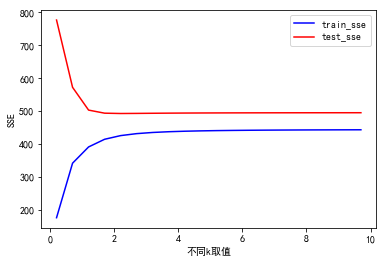

In [67]:
ssePlot(train,test)

In [68]:
train,test = randSplit(aba,0.8)
trainX,trainY = get_Mat(train)
testX,testY = get_Mat(test)
ws0,yHat0 = LWLR(testX,trainX,trainY,k=2)

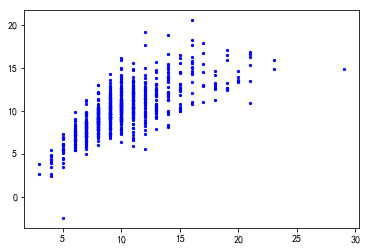

In [69]:
y=testY.A.flatten()
plt.scatter(y,yHat0,c='b',s=5);

In [70]:
def LWLR_pre(dataSet):
    train,test = randSplit(dataSet,0.8)
    trainX,trainY = get_Mat(train)
    testX,testY = get_Mat(test)
    ws,yHat = LWLR(testX,trainX,trainY,k=2)
    sse = ((testY.A.T - yHat)**2).sum()
    sst = ((testY.A-testY.mean())**2).sum()
    r2 = 1 - sse / sst
    return sse,r2

In [71]:
LWLR_pre(aba)

(4152.777097646451, 0.5228101340130622)

In [72]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [73]:
def ridgeRegres(dataSet, lam=0.2):
    xMat,yMat=get_Mat(dataSet)
    xTx = xMat.T * xMat
    denom = xTx + np.eye(xMat.shape[1])*lam
    ws = denom.I * (xMat.T * yMat)
    return ws

In [74]:
#回归系数比较
standRegres(aba)         #线性回归

matrix([[  0.08242085],
        [  4.39330848],
        [ 10.92381422],
        [ 29.91312222],
        [  8.72554079],
        [-20.60349624],
        [-12.09968274],
        [  5.54043538]])

In [75]:
ridgeRegres(aba)         #岭回归

matrix([[  0.08198911],
        [  5.69131271],
        [ 10.57399489],
        [ 25.34980646],
        [  8.08962134],
        [-20.08857516],
        [-10.94149058],
        [  6.49285968]])

In [76]:
#相关系数R2比较
rSquare(aba,standRegres) #线性回归

0.5239481479176779

In [77]:
rSquare(aba,ridgeRegres) #岭回归

0.5233308835711574

In [87]:
def ridgeTest(dataSet,k=30):
    xMat,yMat=get_Mat(dataSet)
    m,n=xMat.shape
    wMat = np.zeros((k,n))
    #特征标准化
    yMean = yMat.mean(0)
    xMeans = xMat.mean(0)
    xVar = xMat.var(0)
    yMat = yMat-yMean
    xMat = (xMat-xMeans)/xVar
    for i in range(k):
        xTx = xMat.T*xMat
        lam = np.exp(i-10)
        denom = xTx+np.eye(n)*lam
        ws=denom.I*(xMat.T*yMat)
        wMat[i,:]=ws.T
    return wMat

In [79]:
yMat[:10]

matrix([[3.176513],
        [3.816464],
        [4.550095],
        [4.256571],
        [4.560815],
        [3.929515],
        [3.52617 ],
        [3.156393],
        [3.110301],
        [3.149813]])

In [80]:
yMat.mean()

3.8356015

In [82]:
xMat[:10]

matrix([[1.      , 0.067732],
        [1.      , 0.42781 ],
        [1.      , 0.995731],
        [1.      , 0.738336],
        [1.      , 0.981083],
        [1.      , 0.526171],
        [1.      , 0.378887],
        [1.      , 0.033859],
        [1.      , 0.132791],
        [1.      , 0.138306]])

In [84]:
xMat.mean(0)

matrix([[1.      , 0.488319]])

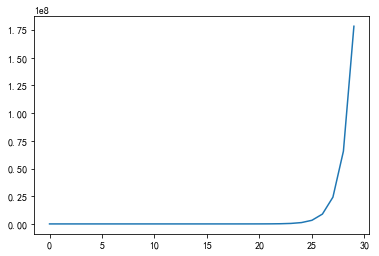

In [85]:
k = np.arange(0,30,1)
lam = np.exp(k-10)
plt.plot(lam);

In [88]:
#回归系数矩阵
wMat = ridgeTest(aba,k=30)

In [94]:
wMat[-1]

array([-3.14727653e-06,  3.41970765e-04,  4.27444083e-04,  1.16907077e-03,
        8.13657661e-05,  1.39419156e-04,  3.38975996e-04,  3.33689580e-04])

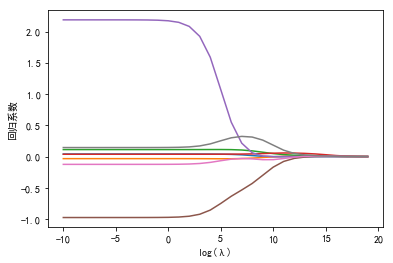

In [90]:
#绘制岭迹图
plt.plot(np.arange(-10,20,1),wMat)
plt.xlabel('log(λ)')
plt.ylabel('回归系数');

In [91]:
e = np.exp(1)
np.log(e)

1.0

In [92]:
np.log2(2)

1.0

In [93]:
np.log10(10)

1.0

In [95]:
#lasso是在linear_model下
from sklearn.linear_model import Lasso

In [99]:
las = Lasso(alpha = 0.05)   #alpha为惩罚系数，值越大惩罚力度越大
las.fit(aba.iloc[:, :-1], aba.iloc[:, -1])

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [100]:
las.coef_

array([-0.        ,  0.        ,  0.        ,  0.        ,  1.20000804,
       -0.        ,  0.        ,  7.92888105])

In [101]:
def regularize(xMat,yMat):
    inxMat = xMat.copy()                   #数据拷贝
    inyMat = yMat.copy()
    yMean = yMat.mean(0)                   #行与行操作，求均值
    inyMat = inyMat - yMean                #数据减去均值
    xMeans = inxMat.mean(0)                #行与行操作，求均值
    xVar = inxMat.var(0)                   #行与行操作，求方差
    inxMat = (inxMat - xMeans) / xVar      #数据减去均值除以方差实现标准化
    return inxMat, inyMat

In [102]:
def rssError(yMat, yHat):
    sse = ((yMat.A-yHat.A)**2).sum()
    return sse

In [103]:
def stageWise(dataSet, eps = 0.01, numIt = 100):
    xMat0,yMat0 = get_Mat(dataSet)             
    xMat,yMat = regularize(xMat0, yMat0)            #数据标准化
    m, n = xMat.shape
    wsMat = np.zeros((numIt, n))                    #初始化numIt次迭代的回归系数矩阵
    ws = np.zeros((n, 1))                           #初始化回归系数矩阵
    wsTest = ws.copy()
    wsMax = ws.copy()
    for i in range(numIt):                          #迭代numIt次
        # print(ws.T)                               #打印当前回归系数矩阵
        lowestError = np.inf                        #正无穷
        for j in range(n):                          #遍历每个特征的回归系数
            for sign in [-1, 1]:
                wsTest = ws.copy()
                wsTest[j] += eps * sign             #微调回归系数
                yHat = xMat * wsTest                #计算预测值
                sse = rssError(yMat, yHat)          #计算平方误差
                if sse < lowestError:               #如果误差更小，则更新当前的最佳回归系数
                    lowestError = sse
                    wsMax = wsTest
        ws = wsMax.copy()
        wsMat[i,:] = ws.T                           #记录numIt次迭代的回归系数矩阵
    return wsMat

In [104]:
stageWise(aba, eps = 0.01, numIt = 200)

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.05,  0.  ,  0.04, ..., -0.63, -0.01,  0.31],
       [ 0.04,  0.  ,  0.04, ..., -0.63, -0.01,  0.31],
       [ 0.05,  0.  ,  0.04, ..., -0.63, -0.01,  0.31]])

In [105]:
wsMat= stageWise(aba, eps = 0.001, numIt = 5000)
wsMat

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.041, -0.021,  0.099, ..., -0.941, -0.113,  0.163],
       [ 0.042, -0.021,  0.099, ..., -0.941, -0.113,  0.163],
       [ 0.041, -0.021,  0.099, ..., -0.941, -0.113,  0.163]])

In [106]:
def standRegres0(dataSet):
    xMat0,yMat0 =get_Mat(dataSet)
    xMat,yMat = regularize(xMat0, yMat0) #增加标准化这一步
    xTx = xMat.T*xMat
    if np.linalg.det(xTx)==0:
        print('矩阵为奇异矩阵，无法求逆')
        return
    ws=xTx.I*(xMat.T*yMat)
    yHat = xMat*ws
    return ws

In [108]:
standRegres0(aba).T

matrix([[ 0.04137178, -0.03288293,  0.11184601,  0.03727445,  2.18649928,
         -0.97453172, -0.12441985,  0.14448086]])

In [109]:
wsMat[-1]

array([ 0.041, -0.021,  0.099,  0.039,  1.997, -0.941, -0.113,  0.163])

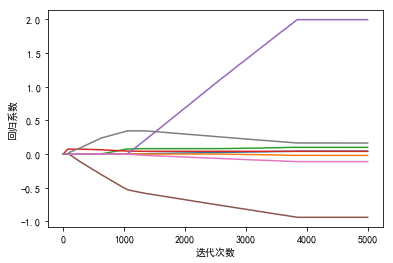

In [110]:
plt.plot(wsMat)
plt.xlabel('迭代次数')
plt.ylabel('回归系数');

In [111]:
from bs4 import BeautifulSoup

In [113]:
infile = 'lego\lego8288.html'
HTML_DOC = open(infile,encoding = 'utf-8').read()

In [119]:
soup = BeautifulSoup(HTML_DOC,'lxml')
i=1
currentRow = soup.find_all('table', r = f'{i}')
currentRow

[<table class="li" r="1"><tr><td class="pic p140 lt"><a class="img" href="#"><img alt="Item image" class="img" src="http://thumbs3.ebaystatic.com/m/mJFeBM5zAghBQuvICGgZcaQ/140.jpg"/></a></td><td class="dtl"><div class="ttl"><a class="vip" href="http://cgi.ebay.com/Lego-Technic-8288-Crawler-crane-/300514626390?pt=LH_DefaultDomain_0&amp;hash=item45f8114b56">Lego Technic 8288 Crawler crane</a></div><div class="dyn dynS"><div class="s1 empty"><div class="mWSpc"></div> </div></div><div class="anchors"><div class="g-nav group"><a href="http://shop.ebay.com/sis.html?_kw=Lego+Technic+8288+Crawler+crane&amp;ssPageName=SRCH%3ACMPL%3AVS&amp;_fis=2&amp;_id=300514626390&amp;_isid=0&amp;_sibeleafcat=156604">View similar active items</a><span class="vbar g-nav"> | </span><a href="http://cgi5.ebay.com/ws/eBayISAPI.dll?SellLikeItem&amp;item=300514626390&amp;ssPageName=STRK:MEWN:LILTX">Sell one like this</a></div></div></td><td class="trs"><img alt="Get fast shipping and excellent service when you buy f

In [123]:
currentRow[0].find_all('a')[1].text

'Lego Technic 8288 Crawler crane'

In [124]:
title = currentRow[0].find_all('a')[1].text

In [125]:
title

'Lego Technic 8288 Crawler crane'

In [127]:
lwrTitle = title.lower()

In [128]:
lwrTitle

'lego technic 8288 crawler crane'

In [131]:
lwrTitle.find('lego')

0

In [134]:
currentRow[0].find_all('td')[3].find_all('span')

[<span class="sold">Sold</span>]

In [137]:
currentRow[0].find_all('td')[4]

'$85.00'

In [139]:
soldPrice = currentRow[0].find_all('td')[4].text

In [141]:
soldPrice.replace('$','')

'85.00'

In [112]:
def scrapePage(data, infile, yr, numPce, origPrc):
    HTML_DOC = open(infile,encoding = 'utf-8').read()
    soup = BeautifulSoup(HTML_DOC,'lxml')
    i=1
    #根据HTML页面结构进行解析
    currentRow = soup.find_all('table', r = f'{i}')
    while(len(currentRow) != 0):
        currentRow = soup.find_all('table', r = f'{i}')
        title = currentRow[0].find_all('a')[1].text
        lwrTitle = title.lower()
        #查找是否有全新标签
        if (lwrTitle.find('new') > -1):
            newFlag = 1
        else:newFlag = 0
        #查找是否已经标志出售，我们只收集已出售的数据
        soldbutt = currentRow[0].find_all('td')[3].find_all('span')
        if len(soldbutt) == 0:
            print(f"商品 #{i} 没有出售")
        else:
            #解析页面获取当前价格
            soldPrice = currentRow[0].find_all('td')[4]
            priceStr = soldPrice.text
            priceStr = priceStr.replace('$','')
            priceStr = priceStr.replace(',','')
            if len(soldPrice) > 1:
                priceStr = priceStr.replace('Free shipping', '')
            sellingPrice = float(priceStr)
            #去掉不完整的套装价格
            if  sellingPrice > origPrc * 0.5:
                data.append([yr, numPce, newFlag, origPrc,sellingPrice])
        i+=1
        currentRow = soup.find_all('table', r = f'{i}')

In [142]:
def setDataCollect(data):
    scrapePage(data, 'lego/lego8288.html', 2006, 800, 49.99)    
    scrapePage(data, 'lego/lego10030.html', 2002, 3096, 269.99) 
    scrapePage(data, 'lego/lego10179.html', 2007, 5195, 499.99) 
    scrapePage(data, 'lego/lego10181.html', 2007, 3428, 199.99) 
    scrapePage(data, 'lego/lego10189.html', 2008, 5922, 299.99) 
    scrapePage(data, 'lego/lego10196.html', 2009, 3263, 249.99) 

In [143]:
data=[]
setDataCollect(data)

商品 #4 没有出售
商品 #11 没有出售
商品 #4 没有出售
商品 #16 没有出售
商品 #18 没有出售
商品 #21 没有出售
商品 #22 没有出售
商品 #2 没有出售
商品 #6 没有出售
商品 #7 没有出售
商品 #9 没有出售
商品 #16 没有出售
商品 #5 没有出售
商品 #6 没有出售
商品 #10 没有出售
商品 #12 没有出售


In [168]:
df = pd.DataFrame(data)

In [170]:
df.head()

,0,1,2,3,4
0,2006,800,0,49.99,85.00
1,2006,800,0,49.99,102.50
2,2006,800,0,49.99,77.00
3,2006,800,0,49.99,162.50
4,2002,3096,0,269.99,699.99


In [171]:
df.columns = ['出品年份','部件数目','全新否','原价','二手售价']
df.head()

,出品年份,部件数目,全新否,原价,二手售价
0,2006,800,0,49.99,85.00
1,2006,800,0,49.99,102.50
2,2006,800,0,49.99,77.00
3,2006,800,0,49.99,162.50
4,2002,3096,0,269.99,699.99


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
出品年份    63 non-null int64
部件数目    63 non-null int64
全新否     63 non-null int64
原价      63 non-null float64
二手售价    63 non-null float64
dtypes: float64(2), int64(3)
memory usage: 2.5 KB


In [173]:
df.describe()

,出品年份,部件数目,全新否,原价,二手售价
count,63.000000,63.000000,63.000000,63.000000,63.000000
mean,2006.603175,4237.380952,0.476190,330.942381,685.397619
std,2.166755,1418.838751,0.503444,137.438717,393.584085
min,2002.000000,800.000000,0.000000,49.990000,77.000000
25%,2007.000000,3263.000000,0.000000,249.990000,399.950000
50%,2007.000000,5195.000000,0.000000,299.990000,589.990000
75%,2008.000000,5195.000000,1.000000,499.990000,855.000000
max,2009.000000,5922.000000,1.000000,499.990000,2204.990000


In [174]:
col_name = df.columns.tolist()

In [175]:
col_name

['出品年份', '部件数目', '全新否', '原价', '二手售价']

In [176]:
col_name.insert(0,'X0')
col_name

['X0', '出品年份', '部件数目', '全新否', '原价', '二手售价']

In [179]:
df=df.reindex(columns=col_name)

In [181]:
df["X0"]=1

In [183]:
df.head()

,X0,出品年份,部件数目,全新否,原价,二手售价
0,1,2006,800,0,49.99,85.00
1,1,2006,800,0,49.99,102.50
2,1,2006,800,0,49.99,77.00
3,1,2006,800,0,49.99,162.50
4,1,2002,3096,0,269.99,699.99


In [184]:
ws = standRegres(df)
ws

matrix([[ 5.52543389e+04],
        [-2.75598885e+01],
        [-2.66942021e-02],
        [-1.22918160e+01],
        [ 2.57381729e+00]])

In [186]:
xMat,yMat = get_Mat(df)
yHat = xMat*ws

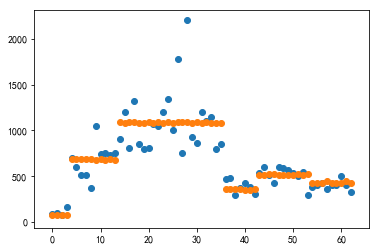

In [187]:
#画出真实值和预测值的散点图
plt.scatter(range(df.shape[0]),yMat.A)
plt.scatter(range(df.shape[0]),yHat.A);

In [188]:
#简单线性回归
rSquare(df,standRegres)

0.6853302688774416

In [189]:
#岭回归
rSquare(df,ridgeRegres)

0.6674385773171043

In [190]:
from sklearn.tree import DecisionTreeRegressor as DTR
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
dtr = DTR().fit(X, y)
dtr.score(X, y)

0.7242221401736537